In [1]:
# Import required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

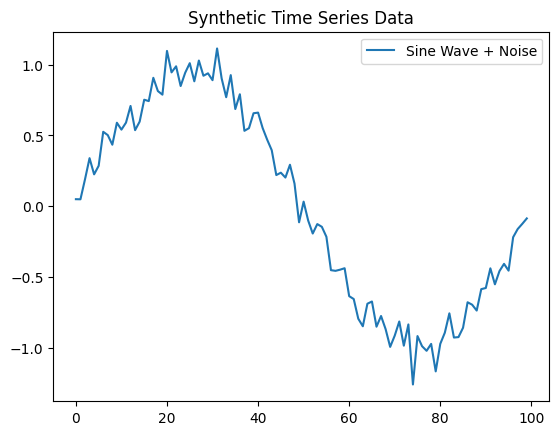

In [2]:
# Generate synthetic time series data
def generate_time_series(steps=1000, freq=0.01):
    time = np.arange(steps)
    data = np.sin(2 * np.pi * freq * time) + np.random.normal(0, 0.1, steps)
    return data

data = generate_time_series()
plt.plot(data[:100], label="Sine Wave + Noise")
plt.title("Synthetic Time Series Data")
plt.legend()
plt.show()

In [3]:
# Prepare sequences for RNN
def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence) - n_steps):
        X.append(sequence[i:i+n_steps])
        y.append(sequence[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 20
X, y = split_sequence(data, n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for RNN input [samples, timesteps, features]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.2383 - val_loss: 0.0349
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0286 - val_loss: 0.0187
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0189 - val_loss: 0.0137
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0150 - val_loss: 0.0119
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0135 - val_loss: 0.0112
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0129 - val_loss: 0.0112
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0123 - val_loss: 0.0108
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0119 - val_loss: 0.0107
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - val_loss: 0.0106
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0114 - val_loss: 0.0105
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0112 - val_loss: 0.0104
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0110 - val_

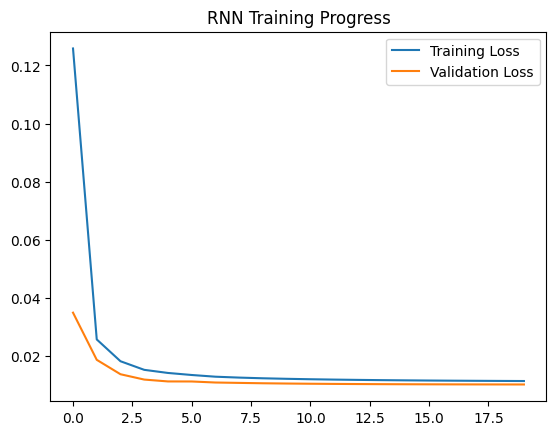

In [4]:
# Define RNN model
model = models.Sequential([
    layers.SimpleRNN(50, activation='tanh', input_shape=(n_steps, 1)),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
history = model.fit(X, y, epochs=20, validation_split=0.2, verbose=1)

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('RNN Training Progress')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


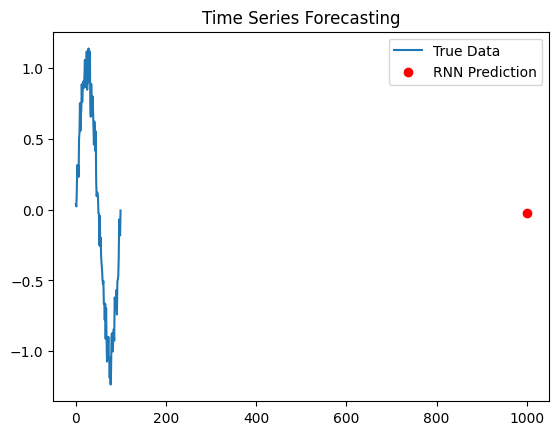

In [5]:
# Predict next values
test_sequence = data[-n_steps:].reshape(1, n_steps, 1)
prediction = model.predict(test_sequence)

# Visualize
plt.plot(data[-100:], label='True Data')
plt.scatter(len(data), prediction, color='red', label='RNN Prediction')
plt.title('Time Series Forecasting')
plt.legend()
plt.show()

In [6]:
# Sample text (replace with your own dataset)
text = "Recurrent neural networks (RNNs) are used for sequential data."
chars = sorted(set(text))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for i, c in enumerate(chars)}

# Convert text to numerical sequences
max_length = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - max_length, step):
    sentences.append(text[i:i+max_length])
    next_chars.append(text[i+max_length])

# Vectorize data
X = np.zeros((len(sentences), max_length, len(chars)), dtype=np.bool_)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool_)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1

In [7]:
# Define character-level RNN
model = models.Sequential([
    layers.SimpleRNN(128, input_shape=(max_length, len(chars))),
    layers.Dense(len(chars), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

# Train
history = model.fit(X, y, batch_size=128, epochs=50, verbose=1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        19,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 22)             │         2,838 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,166 (86.59 KB)

 Trainable params: 22,166 (86.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 3.2117
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.7474
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.3419
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.9968
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.7001
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.4411
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.2152
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.0196
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.8510
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.7062
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.5828
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.4789
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3925
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3214
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2636
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━━━━━

In [8]:
# Function to sample next character
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# Generate text
generated = ""
seed = "Recurrent neural networks"
for _ in range(100):
    x_pred = np.zeros((1, max_length, len(chars)))
    for t, char in enumerate(seed):
        x_pred[0, t, char_to_idx[char]] = 1.
    preds = model.predict(x_pred, verbose=0)[0]
    next_idx = sample(preds, temperature=0.5)
    next_char = idx_to_char[next_idx]
    generated += next_char
    seed = seed[1:] + next_char

print("Generated Text:")
print(seed + generated)

Generated Text:
stlaad.odass.loadofltrdlldlnoa...lltdu(.iotwlfata.tltfacaaa.trd.l(asr..lcata.lotsaeauattoulakanu(atdstlaad.odass.loadofltrdll


### Key Takeaways
* RNNs struggle with long sequences → Use LSTMs/GRUs for better memory.
* Vanishing gradients → Gradient clipping or advanced architectures help.
* Computationally expensive → Consider Transformer-based models for large-scale tasks.